In [1]:
'''
This code uses Python pandas and matplotlib libraries to visualize and analyze network performance of datasets from three CSV files. 
These files contain Thread, average latency and throughput values about network performance on bare-metal servers, virtual machines (VMs), and containers. 
By using the head() function, it displays first 5 rows of the VM data. 
'''

import pandas as pd 
import matplotlib.pyplot as plt

baremetal_data = pd.read_csv('baremetal-cpu-results.csv')
vm_data = pd.read_csv('vm-cpu-results.csv')
container_data = pd.read_csv('container-cpu-results.csv')

vm_data.head()

,Threads,AvgLatency,Events
0,Thread_1,28.36,35.23
1,Thread_2,28.41,70.30
2,Thread_4,28.26,141.43
3,Thread_8,56.19,142.22
4,Thread_16,112.01,142.08


In [2]:
# Here we are getting the columns inside vm_data

vm_data.columns

Index(['Threads', 'AvgLatency', 'Events'], dtype='object')

In [4]:
'''
The dataframe averageLatency has Thread, baremetalNetwork, vmNetwork and containerNetwork average latency information.
It is used to build or generate a graph based on below dataframe columns.
'''

avgLatency = pd.DataFrame({
    "Thread" : baremetal_data['Threads'],
    "baremetalCPU":baremetal_data['AvgLatency'],
    "vmCPU":vm_data['AvgLatency'],
    "containerCPU":container_data['AvgLatency'],
})
avgLatency

,Thread,baremetalCPU,vmCPU,containerCPU
0,Thread_1,28.12,28.36,28.33
1,Thread_2,28.11,28.41,28.09
2,Thread_4,28.09,28.26,29.37
3,Thread_8,28.10,56.19,56.46
4,Thread_16,28.39,112.01,112.13
5,Thread_32,31.87,223.22,221.55
6,Thread_64,48.51,442.98,438.28


In [5]:
'''
The dataframe throughput has Thread, baremetalNetwork, vmNetwork and containerNetwork's throughput information.
It is used to build or generate a graph based on below dataframe columns.
'''

events = pd.DataFrame({
    "Thread" : baremetal_data['Threads'],
    "baremetalCPU":baremetal_data['Events'],
    "vmCPU":vm_data['Events'],
    "containerCPU":container_data['Events'],
})
events

,Thread,baremetalCPU,vmCPU,containerCPU
0,Thread_1,35.55,35.23,35.28
1,Thread_2,71.11,70.30,71.09
2,Thread_4,142.22,141.43,135.80
3,Thread_8,284.44,142.22,140.87
4,Thread_16,562.94,142.08,141.24
5,Thread_32,1001.75,142.03,141.75
6,Thread_64,1315.38,142.13,141.14


#### The below bar graph shows threads vs. throughput (events per second) in bare metal, container, and virtual machines.

range(0, 7)


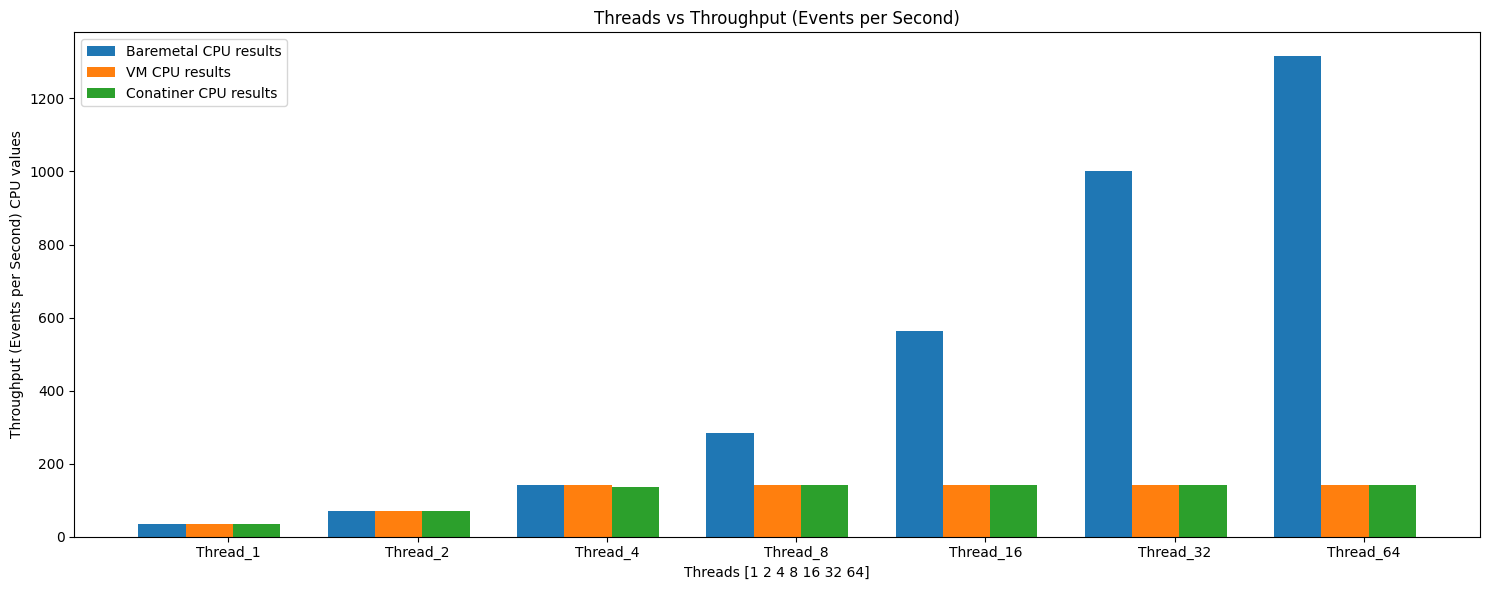

In [6]:
# The barWidth represents the width of each bar in the graph and the value is set to 0.25
# The gapWidth represents the space  between 1 thread information and the other thread information and the value is set to 0.1
# threadInfo is a variable which is used to compute and store the range of events['Thread']
# plt is a reference variable of matplotlib.
# figure initialize the new graph or figure and figsize -> width and height in inches.
# title is method which represents title in graph.
# xlabel is function which represents title of x-axis in graph.
# ylabel is function which represents title of y-axis in graph.
# bar is function which is used to generate a bargraph based on the x and y axis data .
# here I'm drawing 3 bars for 1 thread and 3 bars represents bare-metal, VM and container for each thread.
# xticks are used to label each thread with name and a rotation with 0
# legend function is used to represent each color with its definition
# tight_layout function is used for automatic adjustmentsof plots 


barWidth = 0.25
gapWidth = 0.1

threadInfo = range(len(avgLatency ['Thread']))
print(threadInfo)
plt.figure(figsize=(15, 6))
plt.title("Threads vs Throughput (Events per Second)")
plt.xlabel("Threads [1 2 4 8 16 32 64]")
plt.ylabel("Throughput (Events per Second) CPU values")

plt.bar(threadInfo, events['baremetalCPU'], barWidth, label="Baremetal CPU results")
plt.bar([i + barWidth   for i in threadInfo], events['vmCPU'], barWidth, label = "VM CPU results")
plt.bar([i + barWidth * 2  for i in threadInfo], events['containerCPU'], barWidth, label="Conatiner CPU results")

plt.xticks([i + barWidth + gapWidth for i in threadInfo], avgLatency['Thread'], rotation=0)

plt.legend()
plt.tight_layout()

#### The below bar graph shows threads vs. CPU average latency (events per second) in bare metal, container, and virtual machines.

range(0, 7)


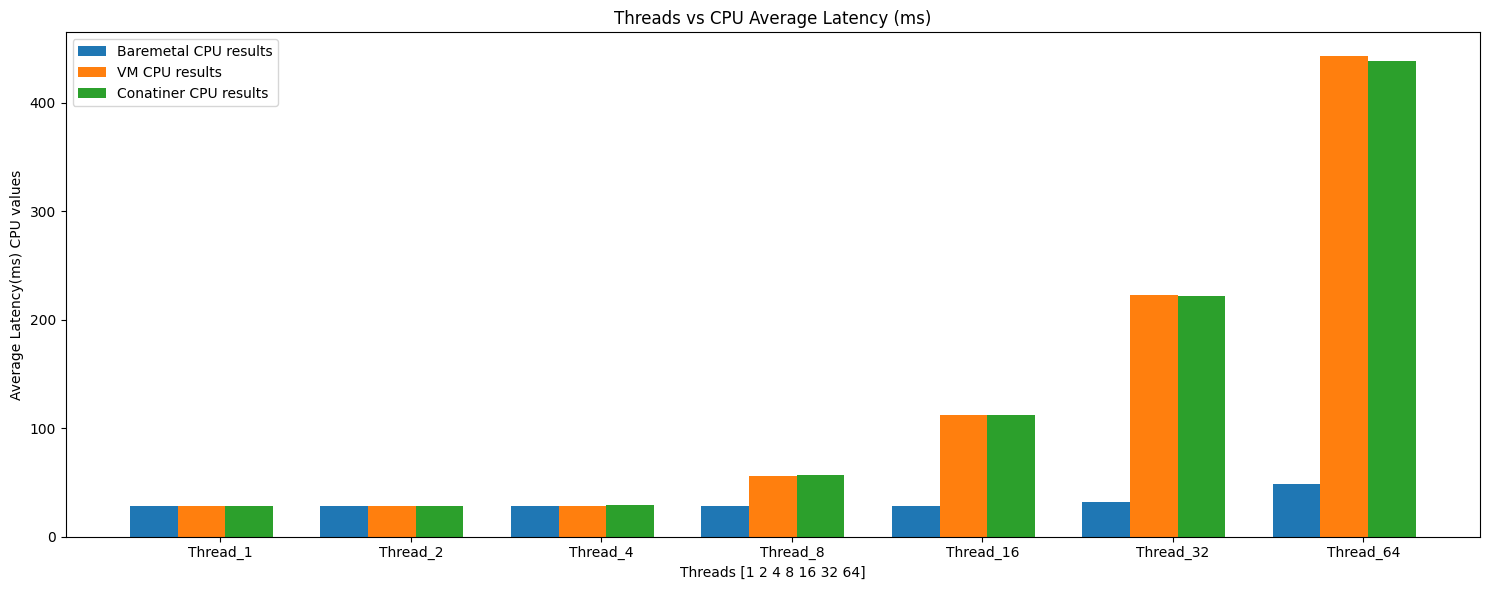

In [7]:
# The barWidth represents the width of each bar in the graph and the value is set to 0.25
# The gapWidth represents the space  between 1 thread information and the other thread information and the value is set to 0.1
# threadInfo is a variable which is used to compute and store the range of avgLatency['Thread']
# plt is a reference variable of matplotlib.
# figure initialize the new graph or figure and figsize -> width and height in inches.
# title is method which represents title in graph.
# xlabel is function which represents title of x-axis in graph.
# ylabel is function which represents title of y-axis in graph.
# bar is function which is used to generate a bargraph based on the x and y axis data .
# here I'm drawing 3 bars for 1 thread and 3 bars represents bare-metal, VM and container for each thread.
# xticks are used to label each thread with name and a rotation with 0
# legend function is used to represent each color with its definition
# tight_layout function is used for automatic adjustmentsof plots 


barWidth = 0.25
gapWidth = 0.1

threadInfo = range(len(avgLatency ['Thread']))
print(threadInfo)
plt.figure(figsize=(15, 6))
plt.title("Threads vs CPU Average Latency (ms)")
plt.xlabel("Threads [1 2 4 8 16 32 64]")
plt.ylabel("Average Latency(ms) CPU values")

plt.bar(threadInfo, avgLatency['baremetalCPU'], barWidth, label="Baremetal CPU results")
plt.bar([i + barWidth   for i in threadInfo], avgLatency['vmCPU'], barWidth, label = "VM CPU results")
plt.bar([i + barWidth * 2  for i in threadInfo], avgLatency['containerCPU'], barWidth, label="Conatiner CPU results")

plt.xticks([i + barWidth + gapWidth for i in threadInfo], avgLatency['Thread'], rotation=0)

plt.legend()
plt.tight_layout()